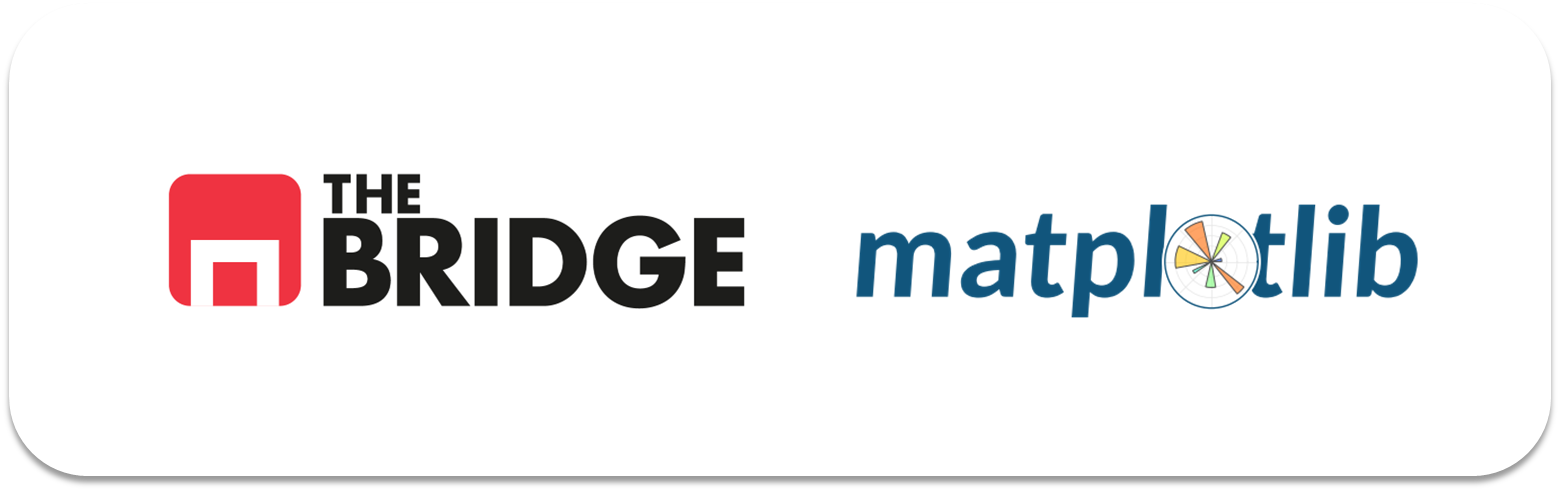

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [2]:
with open("./data/california_cities.csv") as f :
    df = pd.read_csv(f)


In [3]:
df.sample(10)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
159,159,Gonzales,36.506667,-121.444444,41.0,135.0,8187,1.959,1.921,0.038,5.075,4.976,0.098,1.93
294,294,Ontario,34.052778,-117.627778,282.0,925.0,163924,50.006,49.941,0.065,129.515,129.345,0.170,0.13
291,291,Oakley,37.997500,-121.712500,6.0,20.0,35432,16.155,15.853,0.302,41.842,41.059,0.783,1.87
123,123,ElCentro,32.800000,-115.566667,-12.0,-39.0,42598,11.099,11.081,0.018,28.746,28.700,0.046,0.16
114,114,Dorris,41.965000,-121.918889,1294.0,4245.0,939,0.718,0.702,0.016,1.860,1.819,0.041,2.19
436,436,Truckee,39.342222,-120.203611,1773.0,5817.0,16180,33.654,32.322,1.332,87.162,83.713,3.449,3.96
383,383,SanPablo,37.962222,-122.345556,16.0,52.0,29139,2.634,2.634,0.000,6.822,6.822,0.000,0.00
15,15,Arcata,40.866389,-124.082778,NaN,23.0,17231,10.994,9.097,1.897,28.473,23.561,4.912,17.25
465,465,Wheatland,39.010000,-121.423056,28.0,92.0,3456,1.486,1.479,0.007,3.848,3.831,0.017,0.45
360,360,Salinas,36.677778,-121.655556,16.0,52.0,163665,23.217,23.179,0.038,60.131,60.033,0.099,0.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [5]:
df.isna().sum().sort_values(ascending = False)

elevation_m           48
elevation_ft          12
area_total_km2         5
area_water_percent     5
area_land_km2          4
area_water_km2         4
area_total_sq_mi       2
area_water_sq_mi       1
Unnamed: 0             0
city                   0
latd                   0
longd                  0
area_land_sq_mi        0
population_total       0
dtype: int64

In [6]:
elevation_m_NaN = df["elevation_m"].isna()
elevation_ft_NaN = df["elevation_ft"].isna()
df.loc[elevation_m_NaN | elevation_ft_NaN].sample(10)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
228,228,Livermore,37.681944,-121.768056,NaN,495.0,83547,25.176,25.173,0.003,65.204,65.198,0.007,0.01
197,197,JurupaValley,33.999444,-117.475278,NaN,NaN,97496,43.500,43.300,0.200,112.700,112.100,0.600,NaN
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
158,158,Goleta,34.440556,-119.813611,NaN,20.0,29888,7.975,7.903,0.072,20.654,20.467,0.187,0.90
150,150,Fresno,36.750000,-119.766667,NaN,308.0,509039,112.308,111.957,0.351,290.877,289.967,0.910,0.31
372,372,Sanger,36.708056,-119.555833,NaN,371.0,24270,5.524,5.524,0.000,14.307,14.307,0.000,0.00
397,397,Saratoga,37.272500,-122.019444,NaN,410.0,29926,12.382,12.382,0.000,32.070,32.070,0.000,0.00
364,364,SanCarlos,37.499167,-122.263333,NaN,33.0,28406,5.541,5.538,0.003,14.350,14.343,0.007,0.05
380,380,SanMarcos,33.141944,-117.170278,NaN,NaN,83781,24.390,24.370,0.020,63.169,63.117,0.053,0.08
324,324,Pleasanton,37.662500,-121.874722,NaN,351.0,70285,24.266,24.113,0.153,62.847,62.452,0.395,0.63


In [7]:
#En vez de eliminar las columnas que tengan valores vacíos, 
# vamos a rellenar las que estén vacías con el valor de las columnas que no (convirtiendo las unidades de medida)
df_2 = df.copy()

#Elevación

df_2.loc[df["elevation_m"].isna(), "elevation_m"] = df.loc[df["elevation_m"].isna(),"elevation_ft"]*(0.3048)
df_2.loc[df["elevation_ft"].isna(), "elevation_ft"] = df.loc[df["elevation_ft"].isna(),"elevation_m"]*(3.28084)

print(df_2.info(),"\n")
elevation_m_NaN = df_2["elevation_m"].isna()
elevation_ft_NaN = df_2["elevation_ft"].isna()
display(df_2.loc[elevation_m_NaN | elevation_ft_NaN])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         474 non-null    float64
 5   elevation_ft        474 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB
None 



,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
64,64,CarmelbytheSea,36.555278,-121.923333,NaN,NaN,3722,1.080,1.080,0.000,2.798,2.798,0.000,0.00
76,76,Claremont,34.110000,-117.719722,NaN,NaN,34926,13.486,13.348,0.138,34.930,34.571,0.358,1.03
197,197,JurupaValley,33.999444,-117.475278,NaN,NaN,97496,43.500,43.300,0.200,112.700,112.100,0.600,NaN
201,201,LaCaadaFlintridge,34.207721,-118.206979,NaN,NaN,20246,8.645,8.628,0.017,22.391,22.347,0.044,0.20
272,272,Moraga,37.835000,-122.129722,NaN,NaN,16016,9.442,9.433,0.009,24.455,24.432,0.023,0.09
380,380,SanMarcos,33.141944,-117.170278,NaN,NaN,83781,24.390,24.370,0.020,63.169,63.117,0.053,0.08
443,443,UnionCity,37.586944,-122.025833,NaN,NaN,72155,19.000,19.000,0.000,NaN,NaN,NaN,NaN
447,447,Ventura,34.275000,-119.227778,NaN,NaN,106433,32.095,21.655,10.440,83.124,56.085,27.039,32.53


In [8]:
#De estos últimos, lo haremos utilizando la media:
df_2.loc[df["elevation_m"].isna(), "elevation_m"] = df_2["elevation_m"].mean()
df_2.loc[df["elevation_ft"].isna(), "elevation_ft"] = df_2["elevation_ft"].mean()

print(df_2.info(),"\n")
elevation_m_NaN = df_2["elevation_m"].isna()
elevation_ft_NaN = df_2["elevation_ft"].isna()
display(df_2.loc[elevation_m_NaN | elevation_ft_NaN])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         482 non-null    float64
 5   elevation_ft        482 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB
None 



,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent


In [9]:
#Area

area_total_km2_NaN = df["area_total_km2"].isna()
area_total_sq_mi_NaN = df["area_total_sq_mi"].isna()
display(df.loc[area_total_km2_NaN | area_total_sq_mi_NaN])

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
163,163,Gridley,39.363889,-121.693611,29.0,95.0,6593,NaN,2.070,0.000,NaN,2.070,0.000,0.00
237,237,LosAltos,37.368056,-122.097500,NaN,157.0,28976,6.487,6.487,0.000,NaN,NaN,NaN,NaN
335,335,RanchoMirage,33.769167,-116.421111,83.0,272.0,17218,NaN,24.447,0.389,64.326,63.318,1.008,1.57
370,370,SanFrancisco,37.783333,-122.416667,NaN,52.0,837442,231.890,46.870,185.020,NaN,NaN,NaN,80.00
393,393,SantaMonica,34.021944,-118.481389,NaN,105.0,89736,8.416,8.415,0.001,NaN,NaN,NaN,NaN
443,443,UnionCity,37.586944,-122.025833,NaN,NaN,72155,19.000,19.000,0.000,NaN,NaN,NaN,NaN


In [10]:
df_2.loc[df["area_total_km2"].isna(), "area_total_km2"] = df.loc[df["area_total_km2"].isna(), "area_total_sq_mi"]*(2.589988)
df_2.loc[df["area_total_sq_mi"].isna(), "area_total_sq_mi"] = df.loc[df["area_total_sq_mi"].isna(), "area_total_km2"]*(0.386102)

print(df_2.info(),"\n")
area_total_km2_NaN = df_2["area_total_km2"].isna()
area_total_sq_mi_NaN = df_2["area_total_sq_mi"].isna()
display(df.loc[area_total_km2_NaN | area_total_sq_mi_NaN])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         482 non-null    float64
 5   elevation_ft        482 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    481 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      481 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB
None 



,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
163,163,Gridley,39.363889,-121.693611,29.0,95.0,6593,NaN,2.07,0.0,NaN,2.07,0.0,0.0


In [11]:
df_2.loc[163, "area_total_km2"] = df_2.loc[163, "area_land_km2"] + df_2.loc[163, "area_water_km2"]
df_2.loc[163, "area_total_sq_mi"] = df_2.loc[163, "area_land_sq_mi"] + df_2.loc[163, "area_water_sq_mi"]
df_2.loc[163]

Unnamed: 0                   163
city                     Gridley
latd                   39.363889
longd                -121.693611
elevation_m                 29.0
elevation_ft                95.0
population_total            6593
area_total_sq_mi            2.07
area_land_sq_mi             2.07
area_water_sq_mi             0.0
area_total_km2              2.07
area_land_km2               2.07
area_water_km2               0.0
area_water_percent           0.0
Name: 163, dtype: object

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         482 non-null    float64
 5   elevation_ft        482 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    482 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      482 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [13]:
df_2.loc[df["area_land_km2"].isna(), "area_land_km2"] = df.loc[df["area_land_km2"].isna(), "area_land_sq_mi"]*(2.589988)
df_2.loc[df["area_water_km2"].isna(), "area_water_km2"] = df.loc[df["area_water_km2"].isna(), "area_water_sq_mi"]*(2.589988)

print(df_2.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         482 non-null    float64
 5   elevation_ft        482 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    482 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      482 non-null    float64
 11  area_land_km2       482 non-null    float64
 12  area_water_km2      482 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB
None 



In [14]:
df_2.drop(columns=['area_water_percent'], inplace=True)

In [15]:
display(df_2.sample(15))

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2
259,259,Millbrae,37.600833,-122.401389,173.069525,33.000000,21536,3.259,3.247,0.012,8.439,8.409,0.030
268,268,Monterey,36.600000,-121.900000,8.000000,26.000000,27810,11.764,8.466,3.298,30.469,21.927,8.542
227,227,LiveOakSutterCounty,39.275833,-121.660000,173.069525,79.000000,8392,1.869,1.869,0.000,4.839,4.839,0.000
433,433,Torrance,33.834722,-118.341389,27.000000,89.000000,147027,20.553,20.478,0.075,53.233,53.038,0.195
86,86,Colusa,39.214444,-122.009444,16.000000,52.000000,5971,1.834,1.834,0.000,4.751,4.751,0.000
179,179,Hillsborough,37.560278,-122.356389,98.000000,322.000000,10825,6.190,6.190,0.000,16.031,16.031,0.000
105,105,Danville,37.821667,-122.000000,109.000000,358.000000,42039,18.028,18.028,0.000,46.693,46.693,0.000
186,186,ImperialBeach,32.578333,-117.117222,21.000000,69.000000,26324,4.485,4.161,0.324,11.616,10.778,0.838
447,447,Ventura,34.275000,-119.227778,173.069525,564.258244,106433,32.095,21.655,10.440,83.124,56.085,27.039
334,334,RanchoCucamonga,34.123333,-117.579444,368.000000,1207.000000,170746,39.871,39.851,0.020,103.263,103.212,0.051


#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

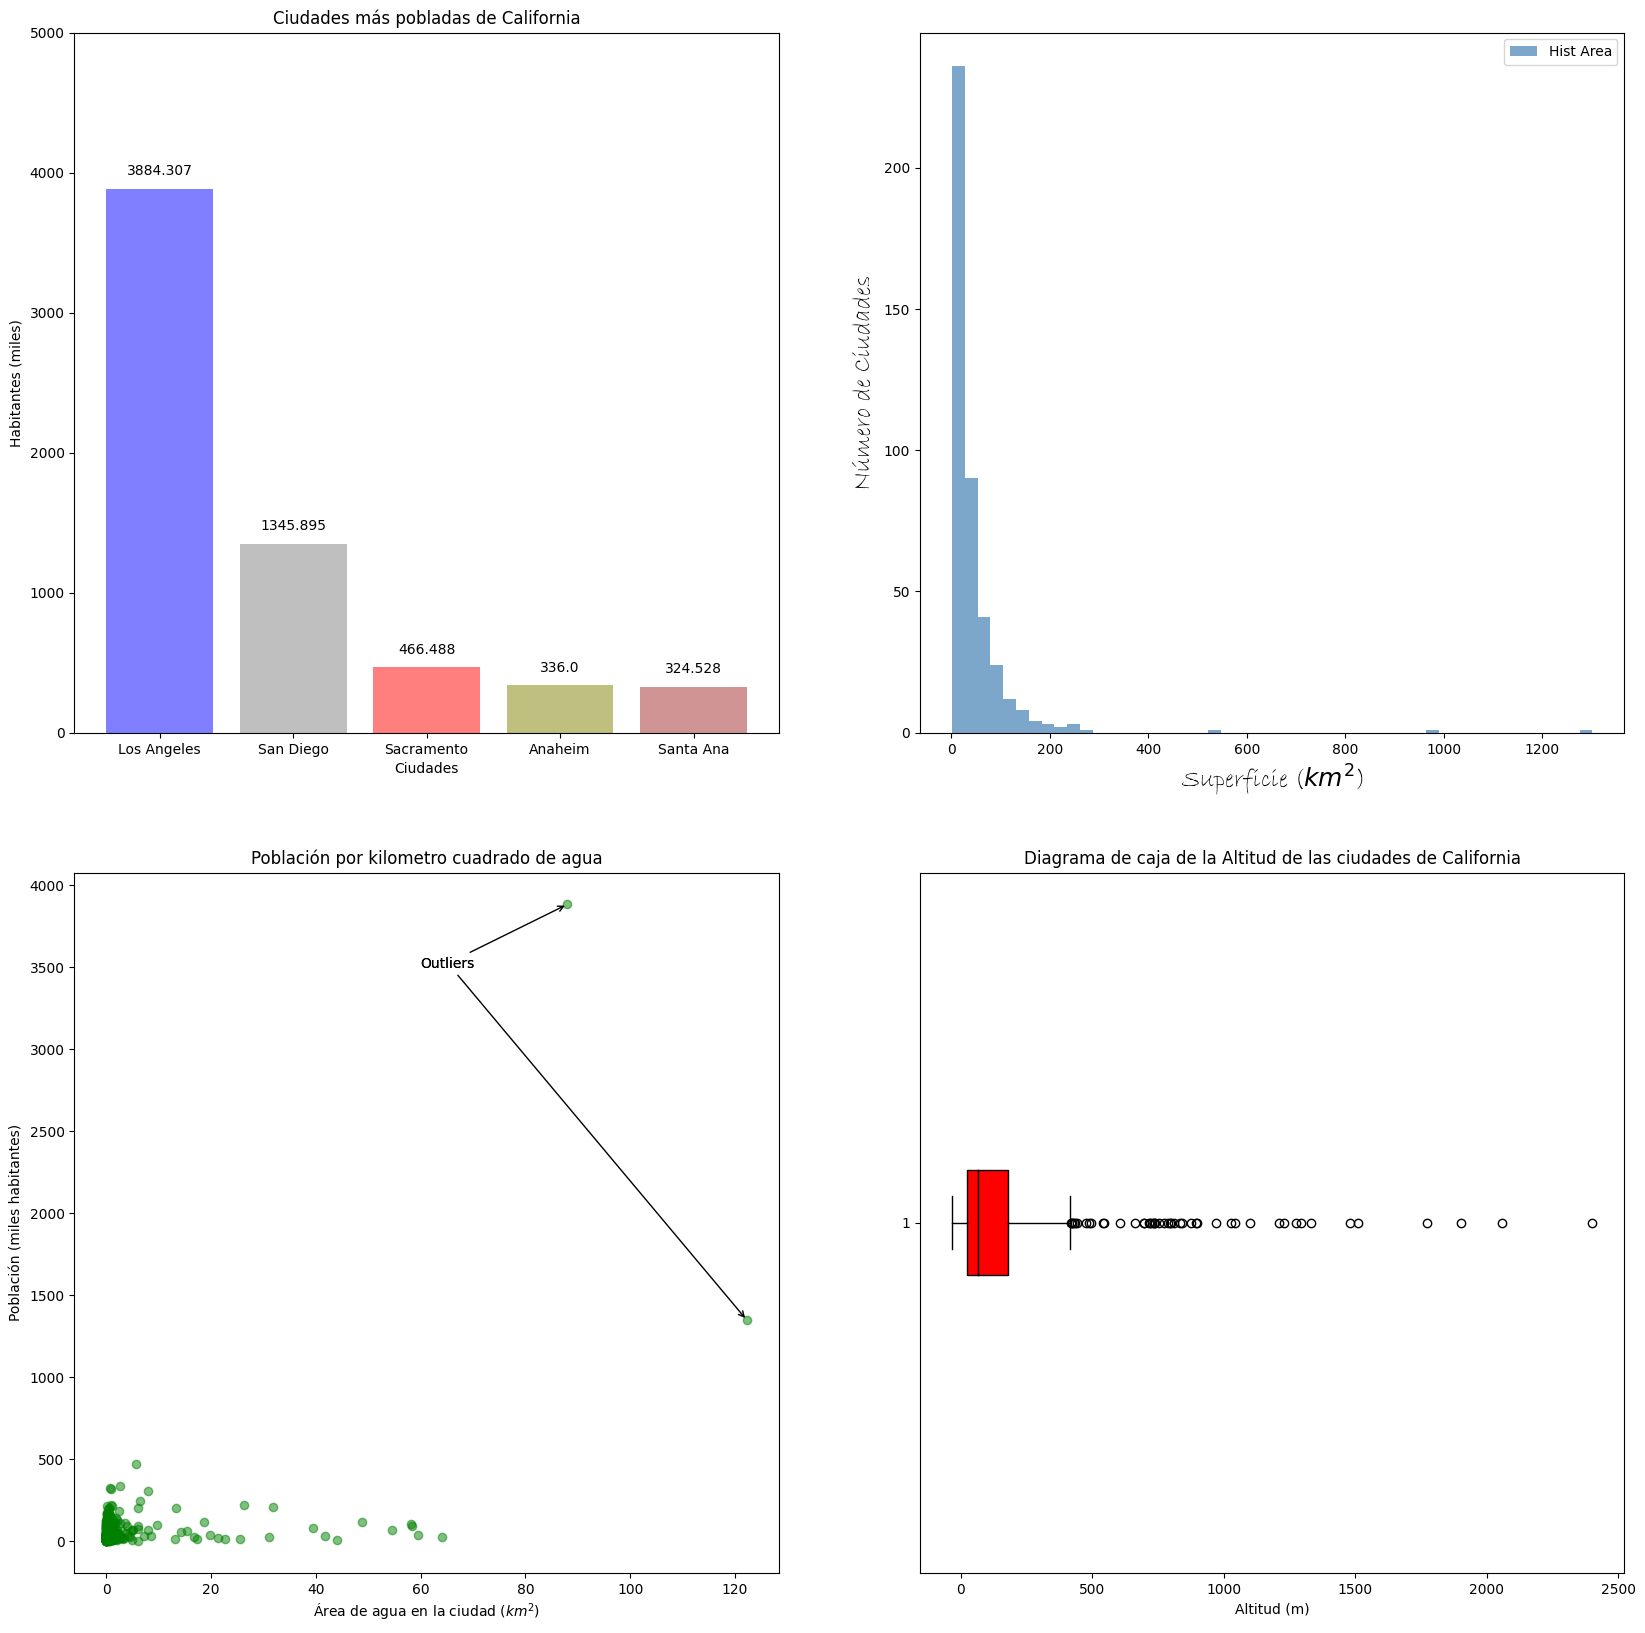

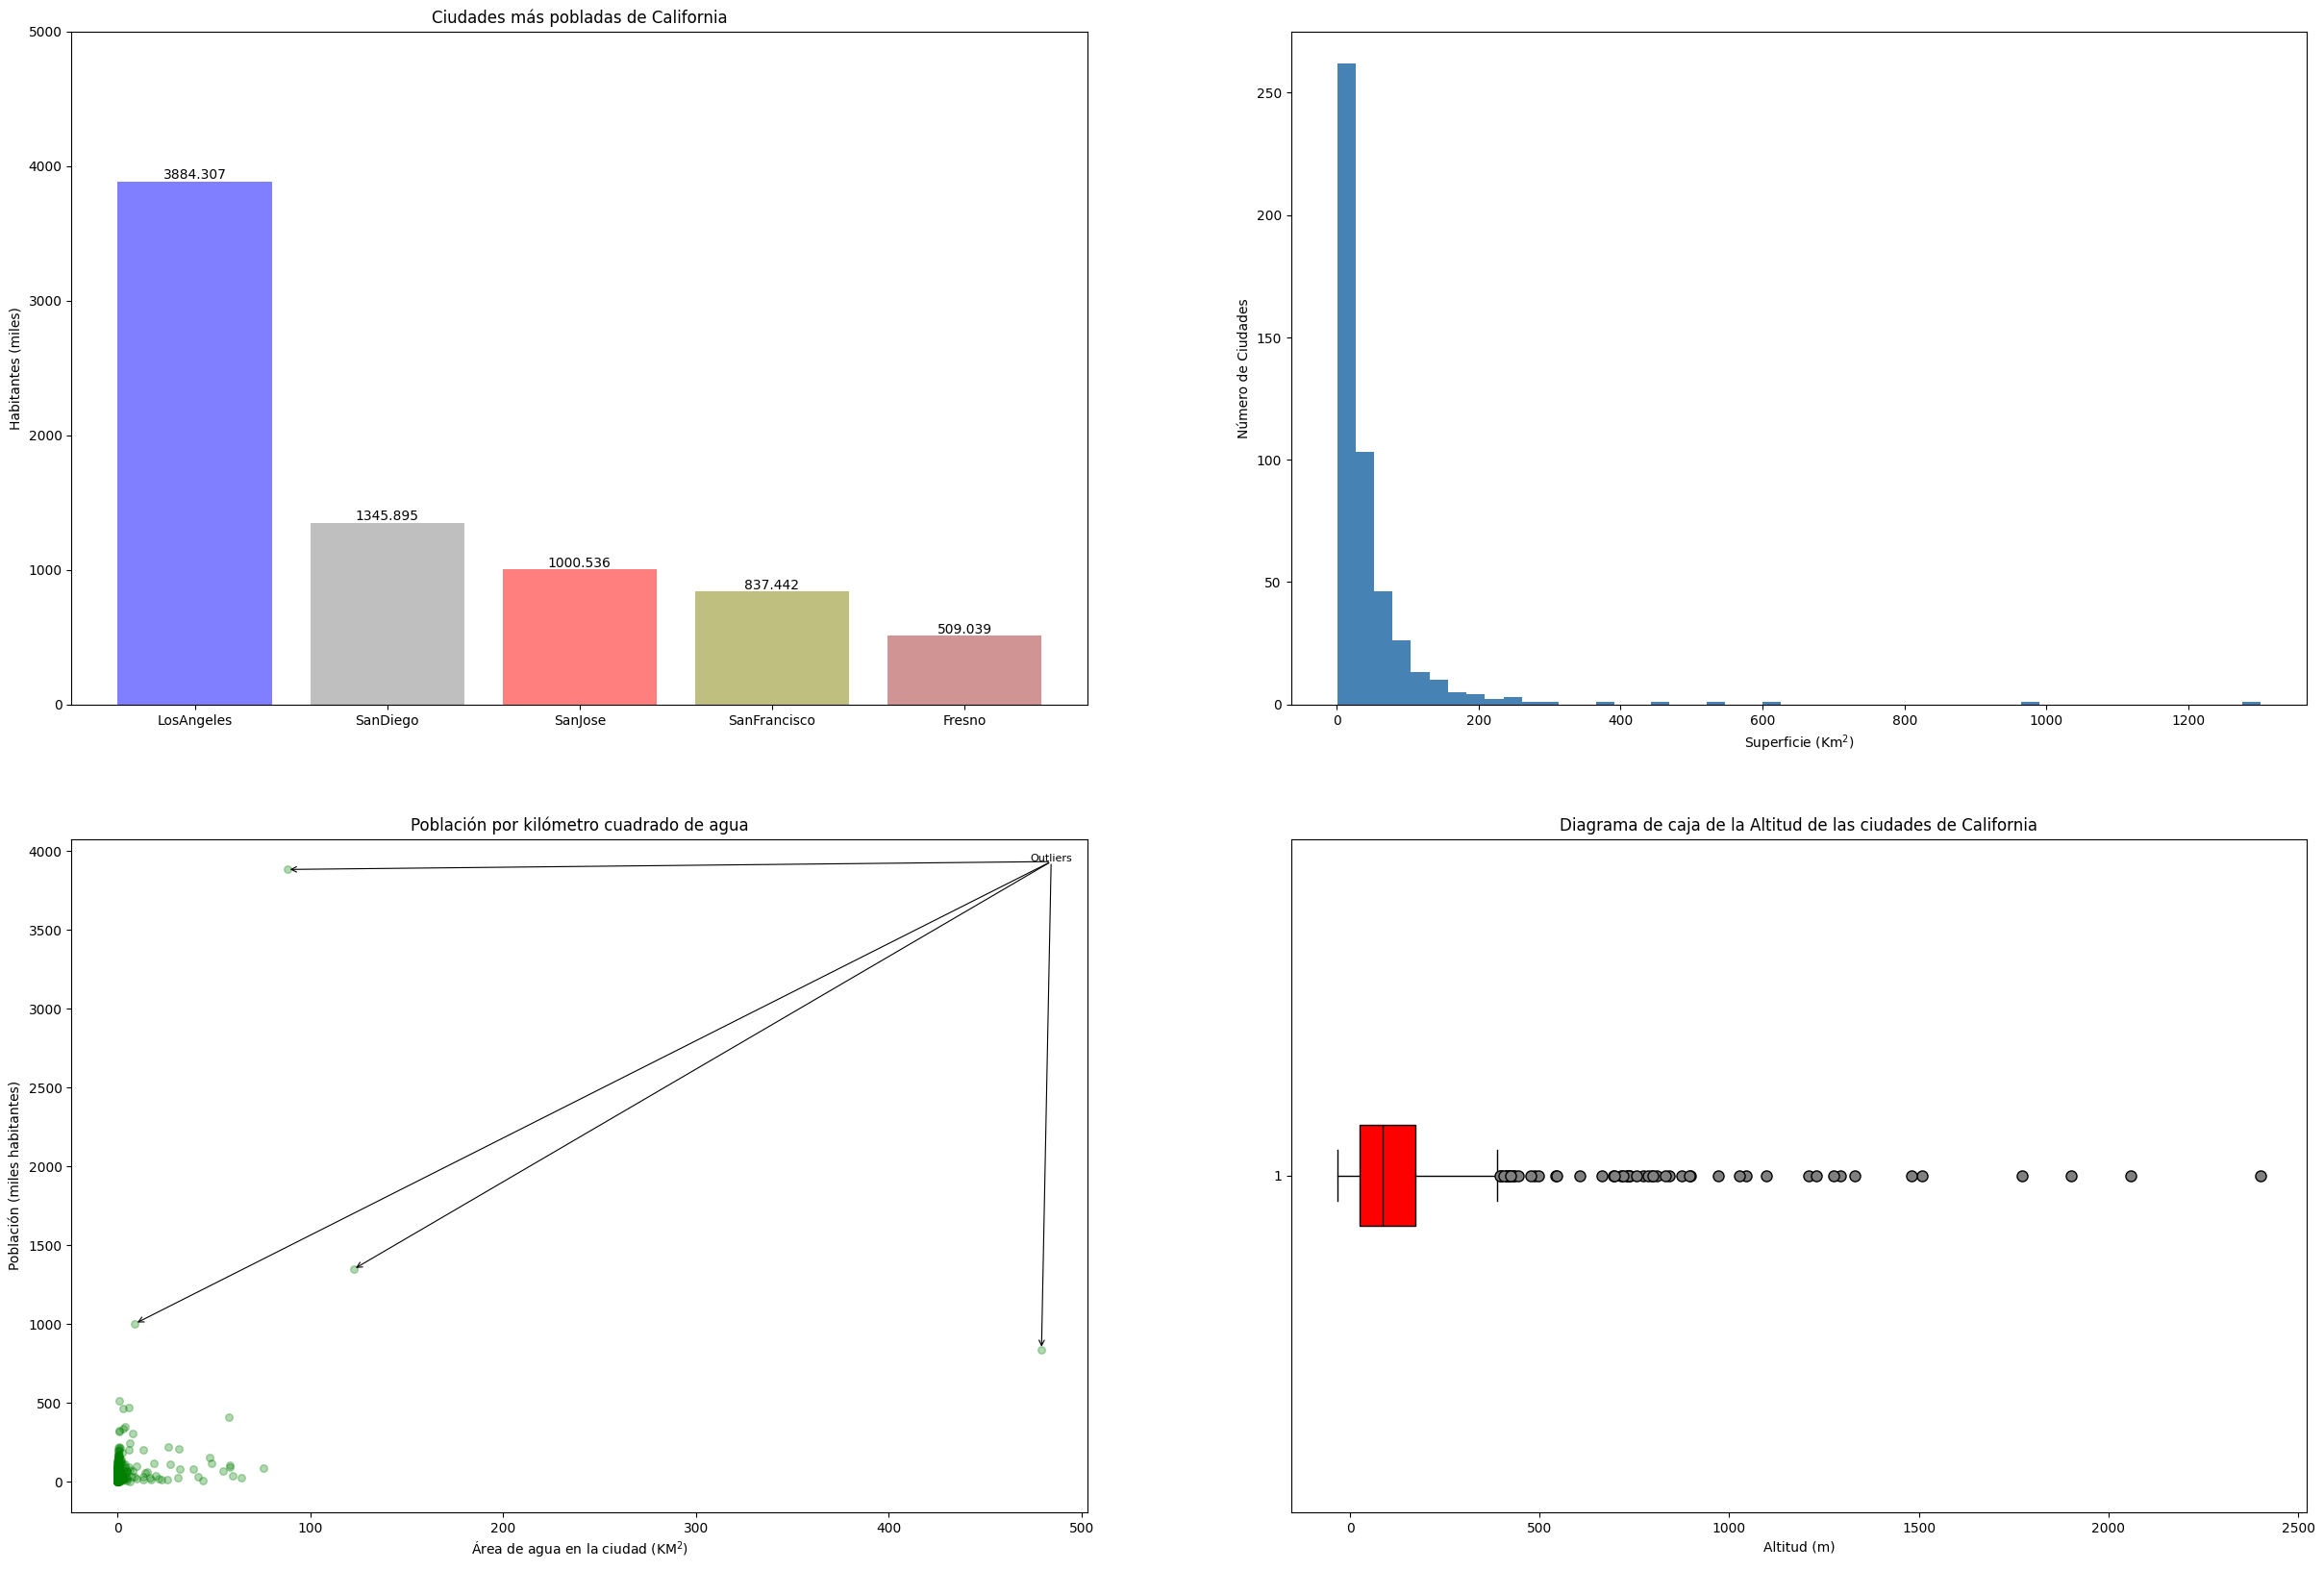

In [16]:
top5_ciudades_pob =  df_2.sort_values(
    by='population_total',
    ascending=False
).head(5)
area_total = df_2["area_total_km2"]
area_water = df_2["area_water_km2"]
poblacion_miles = df_2['population_total']/1000
elevation = df_2["elevation_m"]

fig, axs = plt.subplots(2, 2, figsize=(30, 20))

fig.subplots_adjust(
    hspace = 0.2,
    wspace = 0.2
)

###############################
# --- Gráfico 1 ---
###############################
ax = axs[0, 0]

ax.bar(
    top5_ciudades_pob['city'].tolist(),
    (top5_ciudades_pob['population_total']/1000).tolist(),
    color=['#7f7fff', '#bfbfbf', '#ff7f7f', '#bfbf7f', '#d19494']
)

ax.set_title("Ciudades más pobladas de California")
ax.set_ylabel("Habitantes (miles)")

# valores = top5_ciudades_pob['population_total'].tolist()
# max_val = max(valores)
ticks = range(0, 5001, 1000)
ax.set_yticks(ticks)

ax.set_yticklabels([f"{int(t)}" for t in ticks])

for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f"{altura}",
        ha='center', va='bottom',
        fontsize = 10
    )

###############################
# Gráfico 2
###############################
ax2 = axs[0, 1]
ax2.hist(
    area_total,
    bins = 50,
    color = 'steelblue'
)

ax2.set_xlabel('Superficie (Km$^2$)')
ax2.set_ylabel('Número de Ciudades')

###############################
# Gráfico 3
###############################
ax3 = axs[1, 0]
ax3.scatter(
    area_water,
    poblacion_miles,
    c="#008000",
    s = 30, 
    alpha=0.3
)

# --- Detectar outliers usando IQR ---
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

outlier_indices_x = find_outliers(area_water)
outlier_indices_y = find_outliers(poblacion_miles)

# Unimos índices (solo puntos que sean outliers en x o y)
outlier_indices = np.union1d(outlier_indices_x, outlier_indices_y)
#np.union1d Devuelve un nuevo array con todos los elementos presentes en cualquiera de los dos, 
# ordenados de menor a mayor y sin duplicados.

# Coordenadas de los outliers
outliers = [(area_water[i], poblacion_miles[i]) for i in outlier_indices]

# --- Posición de la etiqueta ---
label_x = np.max(area_water) + 5  # un poco a la derecha
label_y = np.max(poblacion_miles) + 50  # un poco arriba del extremo

# Ordenar los outliers manualmente por Y (población)
outliers_sorted = outliers.copy()
for i in range(len(outliers_sorted)):
    for j in range(i+1, len(outliers_sorted)):
        if outliers_sorted[j][1] > outliers_sorted[i][1]:
            outliers_sorted[i], outliers_sorted[j] = outliers_sorted[j], outliers_sorted[i]

# Tomar los 4 más extremos (o todos si hay menos de 4)
top_outliers = outliers_sorted[:4]

# Dibujar flechas hacia cada uno
for pt in top_outliers:
    ax3.annotate(
        '', 
        xy=pt,
        xytext=(label_x, label_y),
        arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
    )

# Etiqueta única
ax3.text(label_x, label_y, "Outliers", fontsize=8, color='black', ha='center')


ax3.set_xlabel('Área de agua en la ciudad (KM$^2$)')
ax3.set_ylabel('Población (miles habitantes)')

ax3.set_title('Población por kilómetro cuadrado de agua')

###############################
# Gráfico 4
###############################
ax4 = axs[1, 1]
ax4.boxplot(
    elevation,
    patch_artist=True,
    vert = False,
    medianprops={'color': 'black', 'linewidth': 1}, # Mediana negra
    boxprops={'facecolor': 'red', 'edgecolor': 'black'}, # Caja roja
    flierprops={'marker': 'o', 'markerfacecolor': 'grey', 'markersize': 8} # Outliers grises
)
ax4.set_title('Diagrama de caja de la Altitud de las ciudades de California')
ax4.set_xlabel('Altitud (m)')

plt.show();



#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

In [17]:
fig.savefig("Graficas_Challenge.png")